In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={"figure.dpi":150})
sns.set_style("whitegrid")

In [2]:
data = pd.read_csv(r'data\aerofit_treadmill.csv')

## Dataset details

<b>Product Purchased:</b>	KP281, KP481, or KP781<br>
<b>Age:</b>	In years<br>
<b>Gender:</b>	Male/Female<br>
<b>Education:</b>	In years<br>
<b>MaritalStatus:</b>	Single or partnered<br>
<b>Usage:</b>	The average number of times the customer plans to use the treadmill each week.<br>
<b>Income:</b>	Annual income (in $)<br>
<b>Fitness:</b>	Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is the excellent shape.<br>
<b>Miles:</b>	The average number of miles the customer expects to walk/run each week<br>

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [4]:
data.describe(include='all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


#### Observations-

1. There are 3 object columns `Product`, `Gender`, `MaritalStatus` that seems category type.<br>
2. High value of standard devidation for column miles that is 51.86 whereas mean is 103.19.
3. No missing values in data.

In [5]:
# Converting type to category
data = data.astype({'Product':'category', 'Gender':'category', 'MaritalStatus':'category' })

In [6]:
data.nunique()

Product           3
Age              32
Gender            2
Education         8
MaritalStatus     2
Usage             6
Fitness           5
Income           62
Miles            37
dtype: int64

Columns `Education`, `Usage`, `Fitness` are looks like ordinal type.

## Univariate Analysis

### Category columns

In [7]:
for i in data.select_dtypes(['category']):
    display(data[i].value_counts())

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

Male      104
Female     76
Name: Gender, dtype: int64

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

#### Observations-
1. Maximum people buys KP281 and less people buys KP781.
2. More male customer than female.
3. Partnered people are more than Single.

### Numerical columns

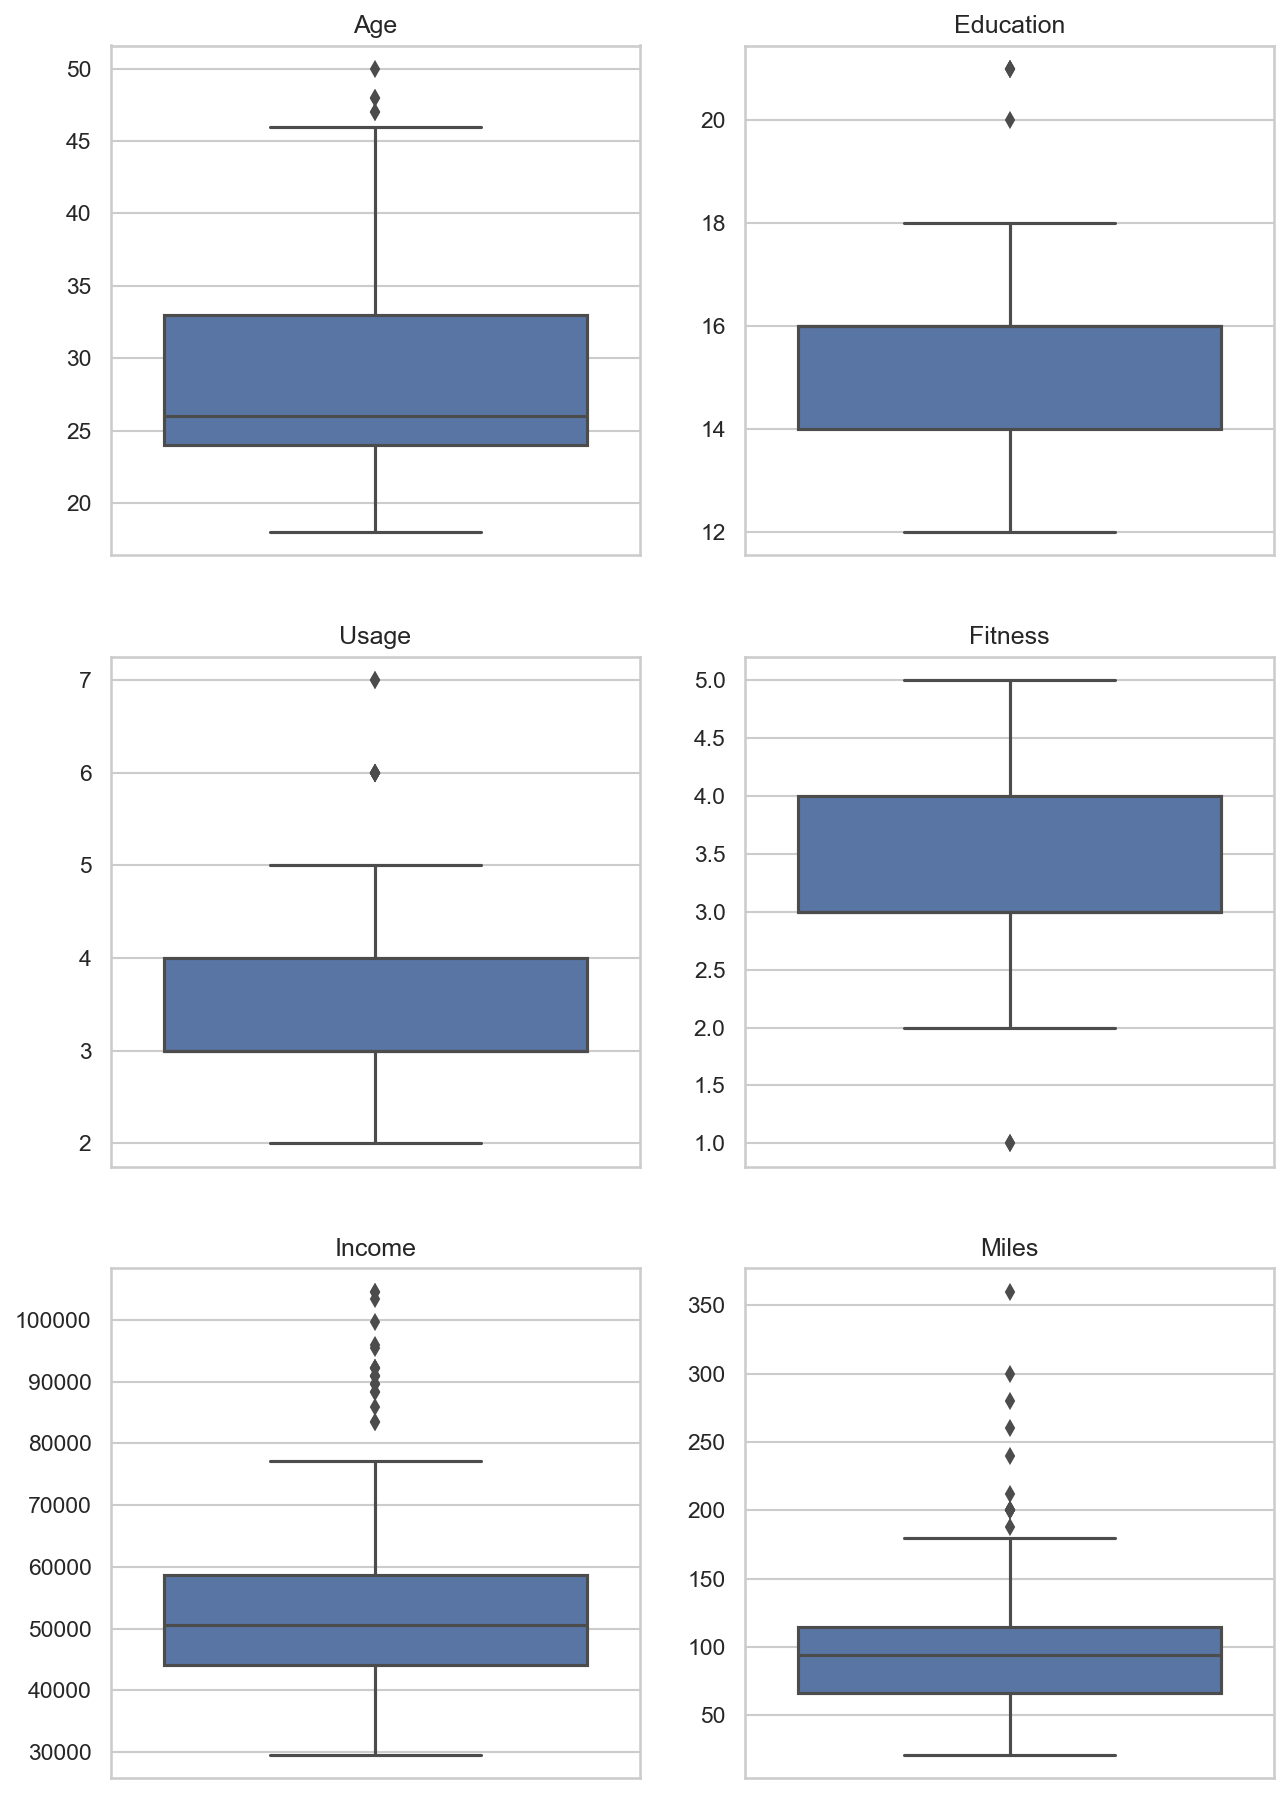

In [8]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(10, 15))
plt.subplots_adjust(hspace=0.2)

for i, ax in zip(data.select_dtypes(exclude=['object', 'category']), axs.ravel()):
    sns.boxplot(data[i], ax=ax)
    ax.set_title(i)
    ax.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False) # labels along the bottom edge are off)


#### Observations-
1. Most customer's age is in range 22-35 years. Few buyers have age more than 45 years.
2. Education ranges mostly in 14-16 years. Very few people have education more than 18 years.
3. Only two people have Usage vlaue more than 5.
4. Generally people giving Fitness value between 3 and 4.
5. There are lot of outliers for columns `Income` and `Miles`.

<br>
As the dataset is small so we are not treating the outliers but we will treat them later as needed.

## Bivariate Analysis

#### Numerical columns vs. Product

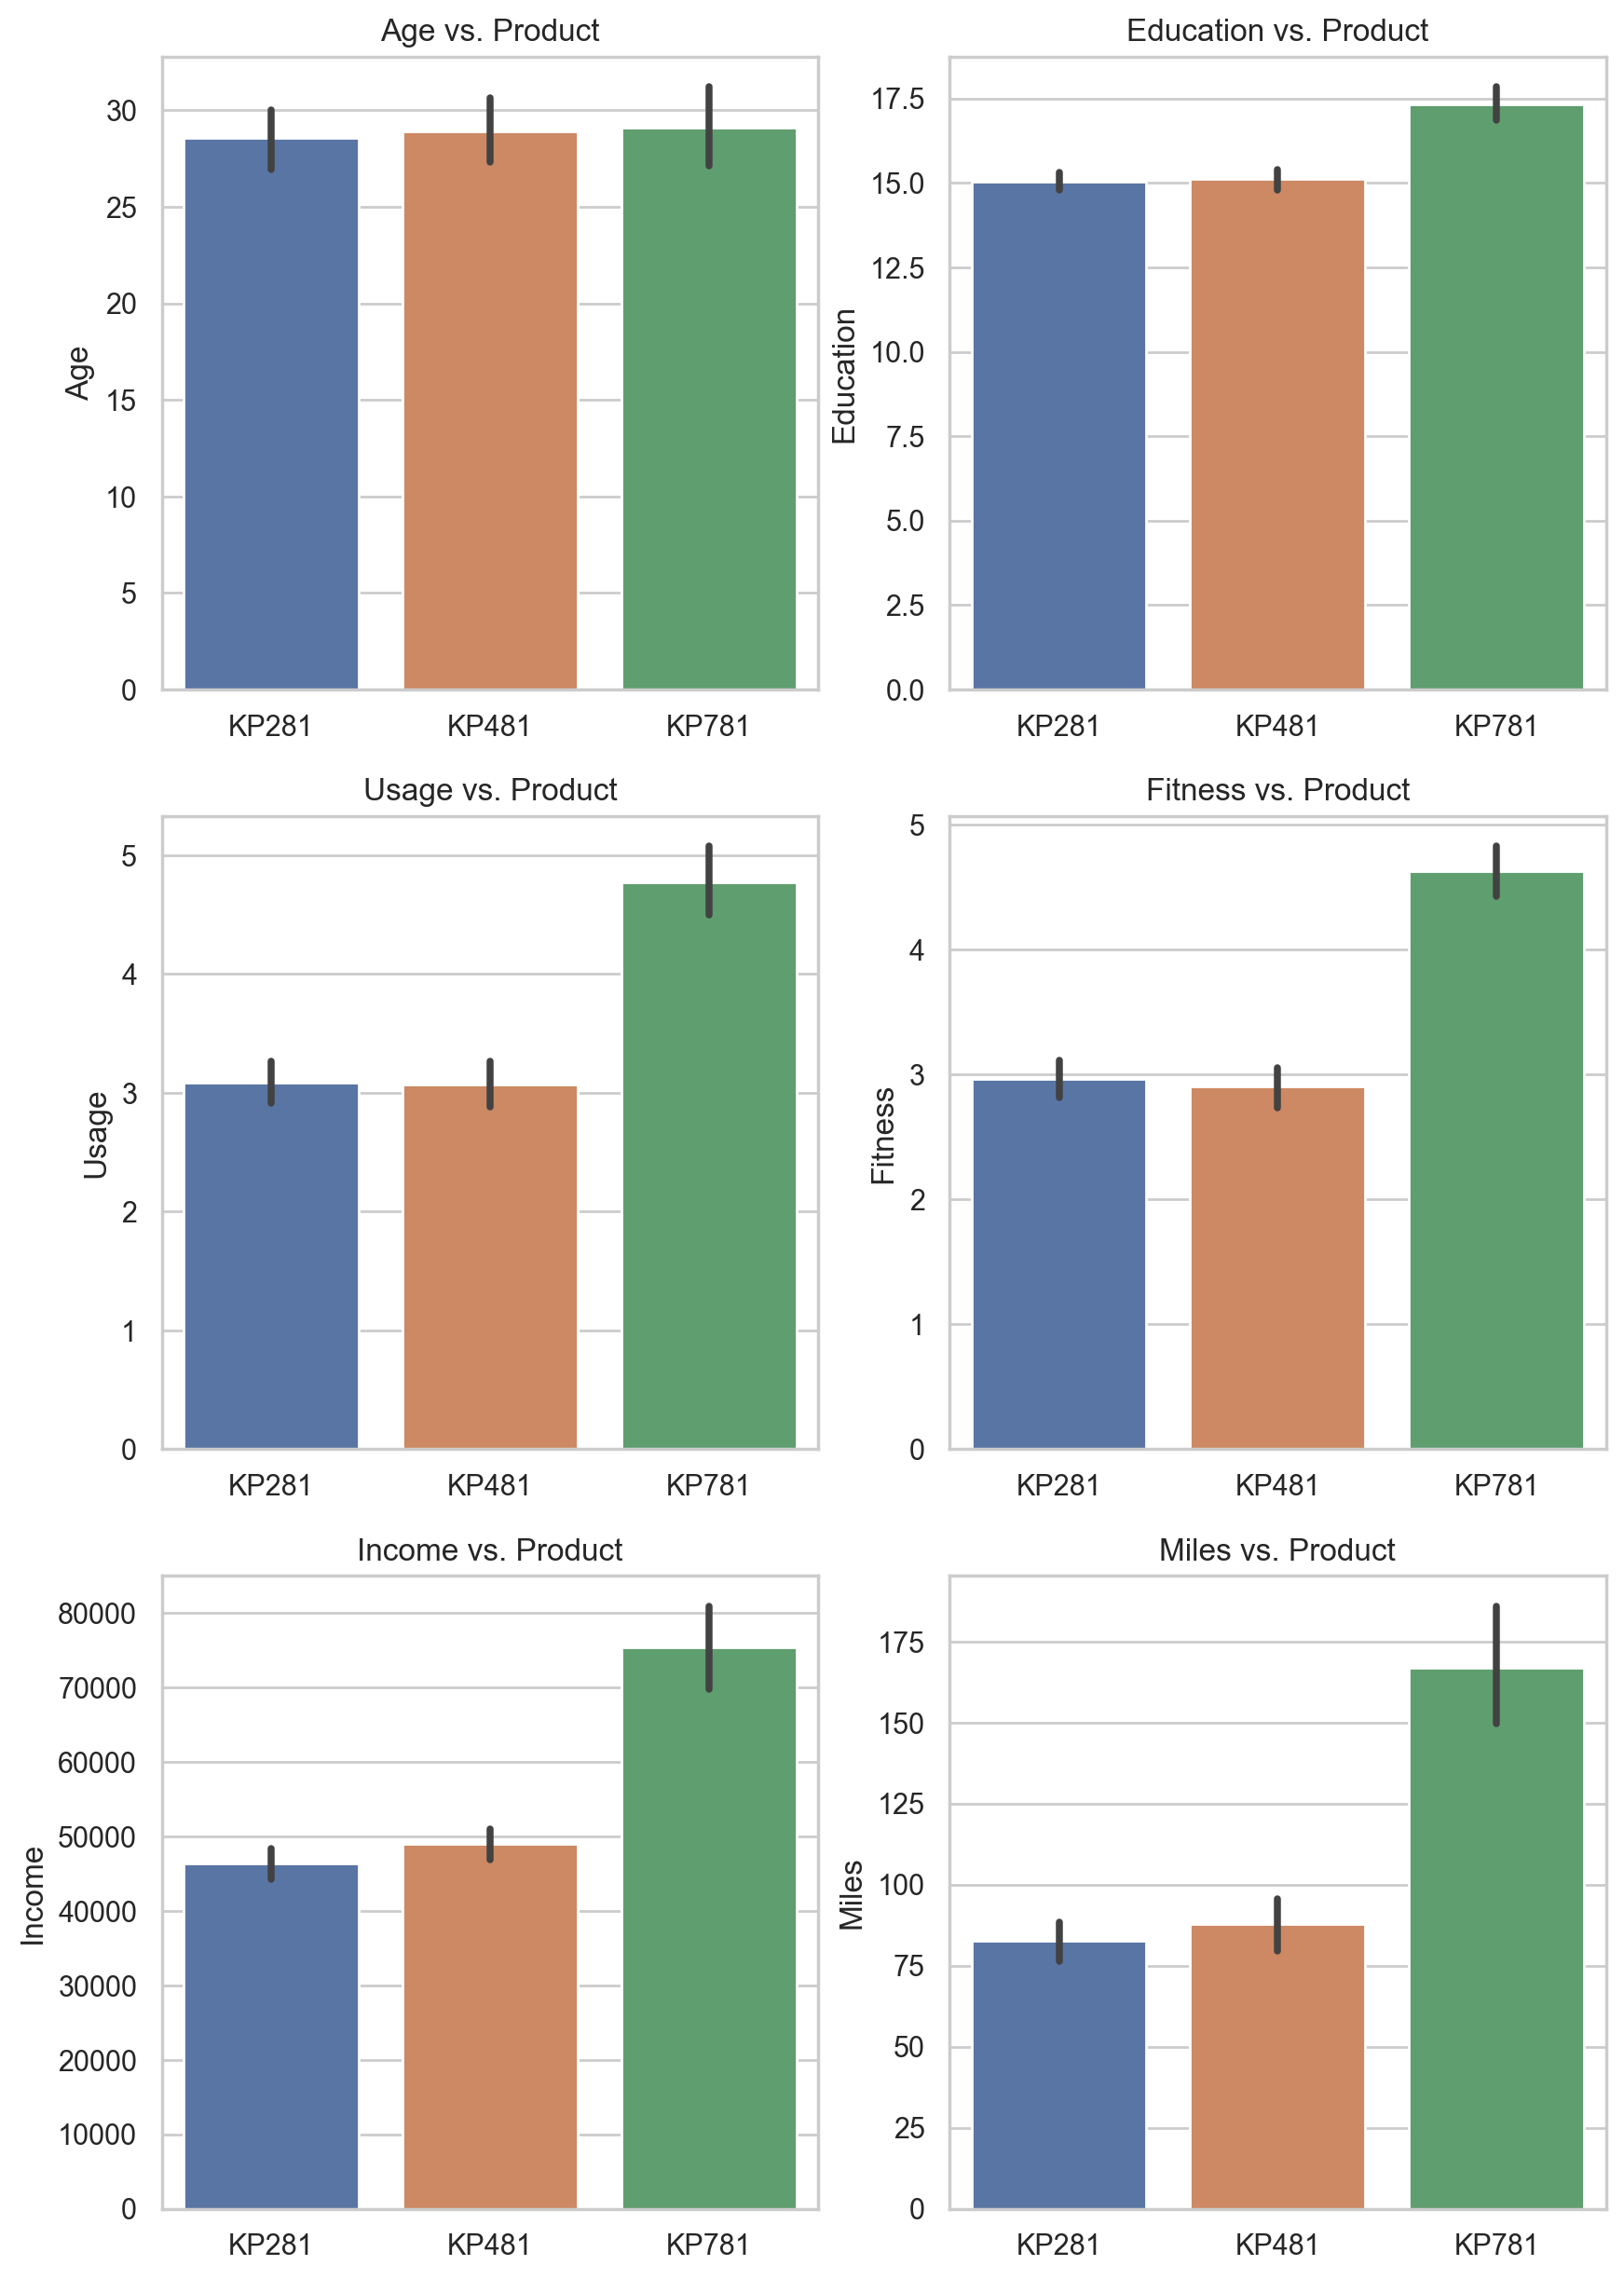

In [9]:

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(10, 15), dpi=200)
plt.subplots_adjust(hspace=0.2)

for i, ax in zip(data.select_dtypes(exclude=['object', 'category']), axs.ravel()):
    sns.barplot(data=data, x='Product', y=i, ax=ax)
    ax.set_title(i+' vs. Product')
    ax.set_xlabel('')

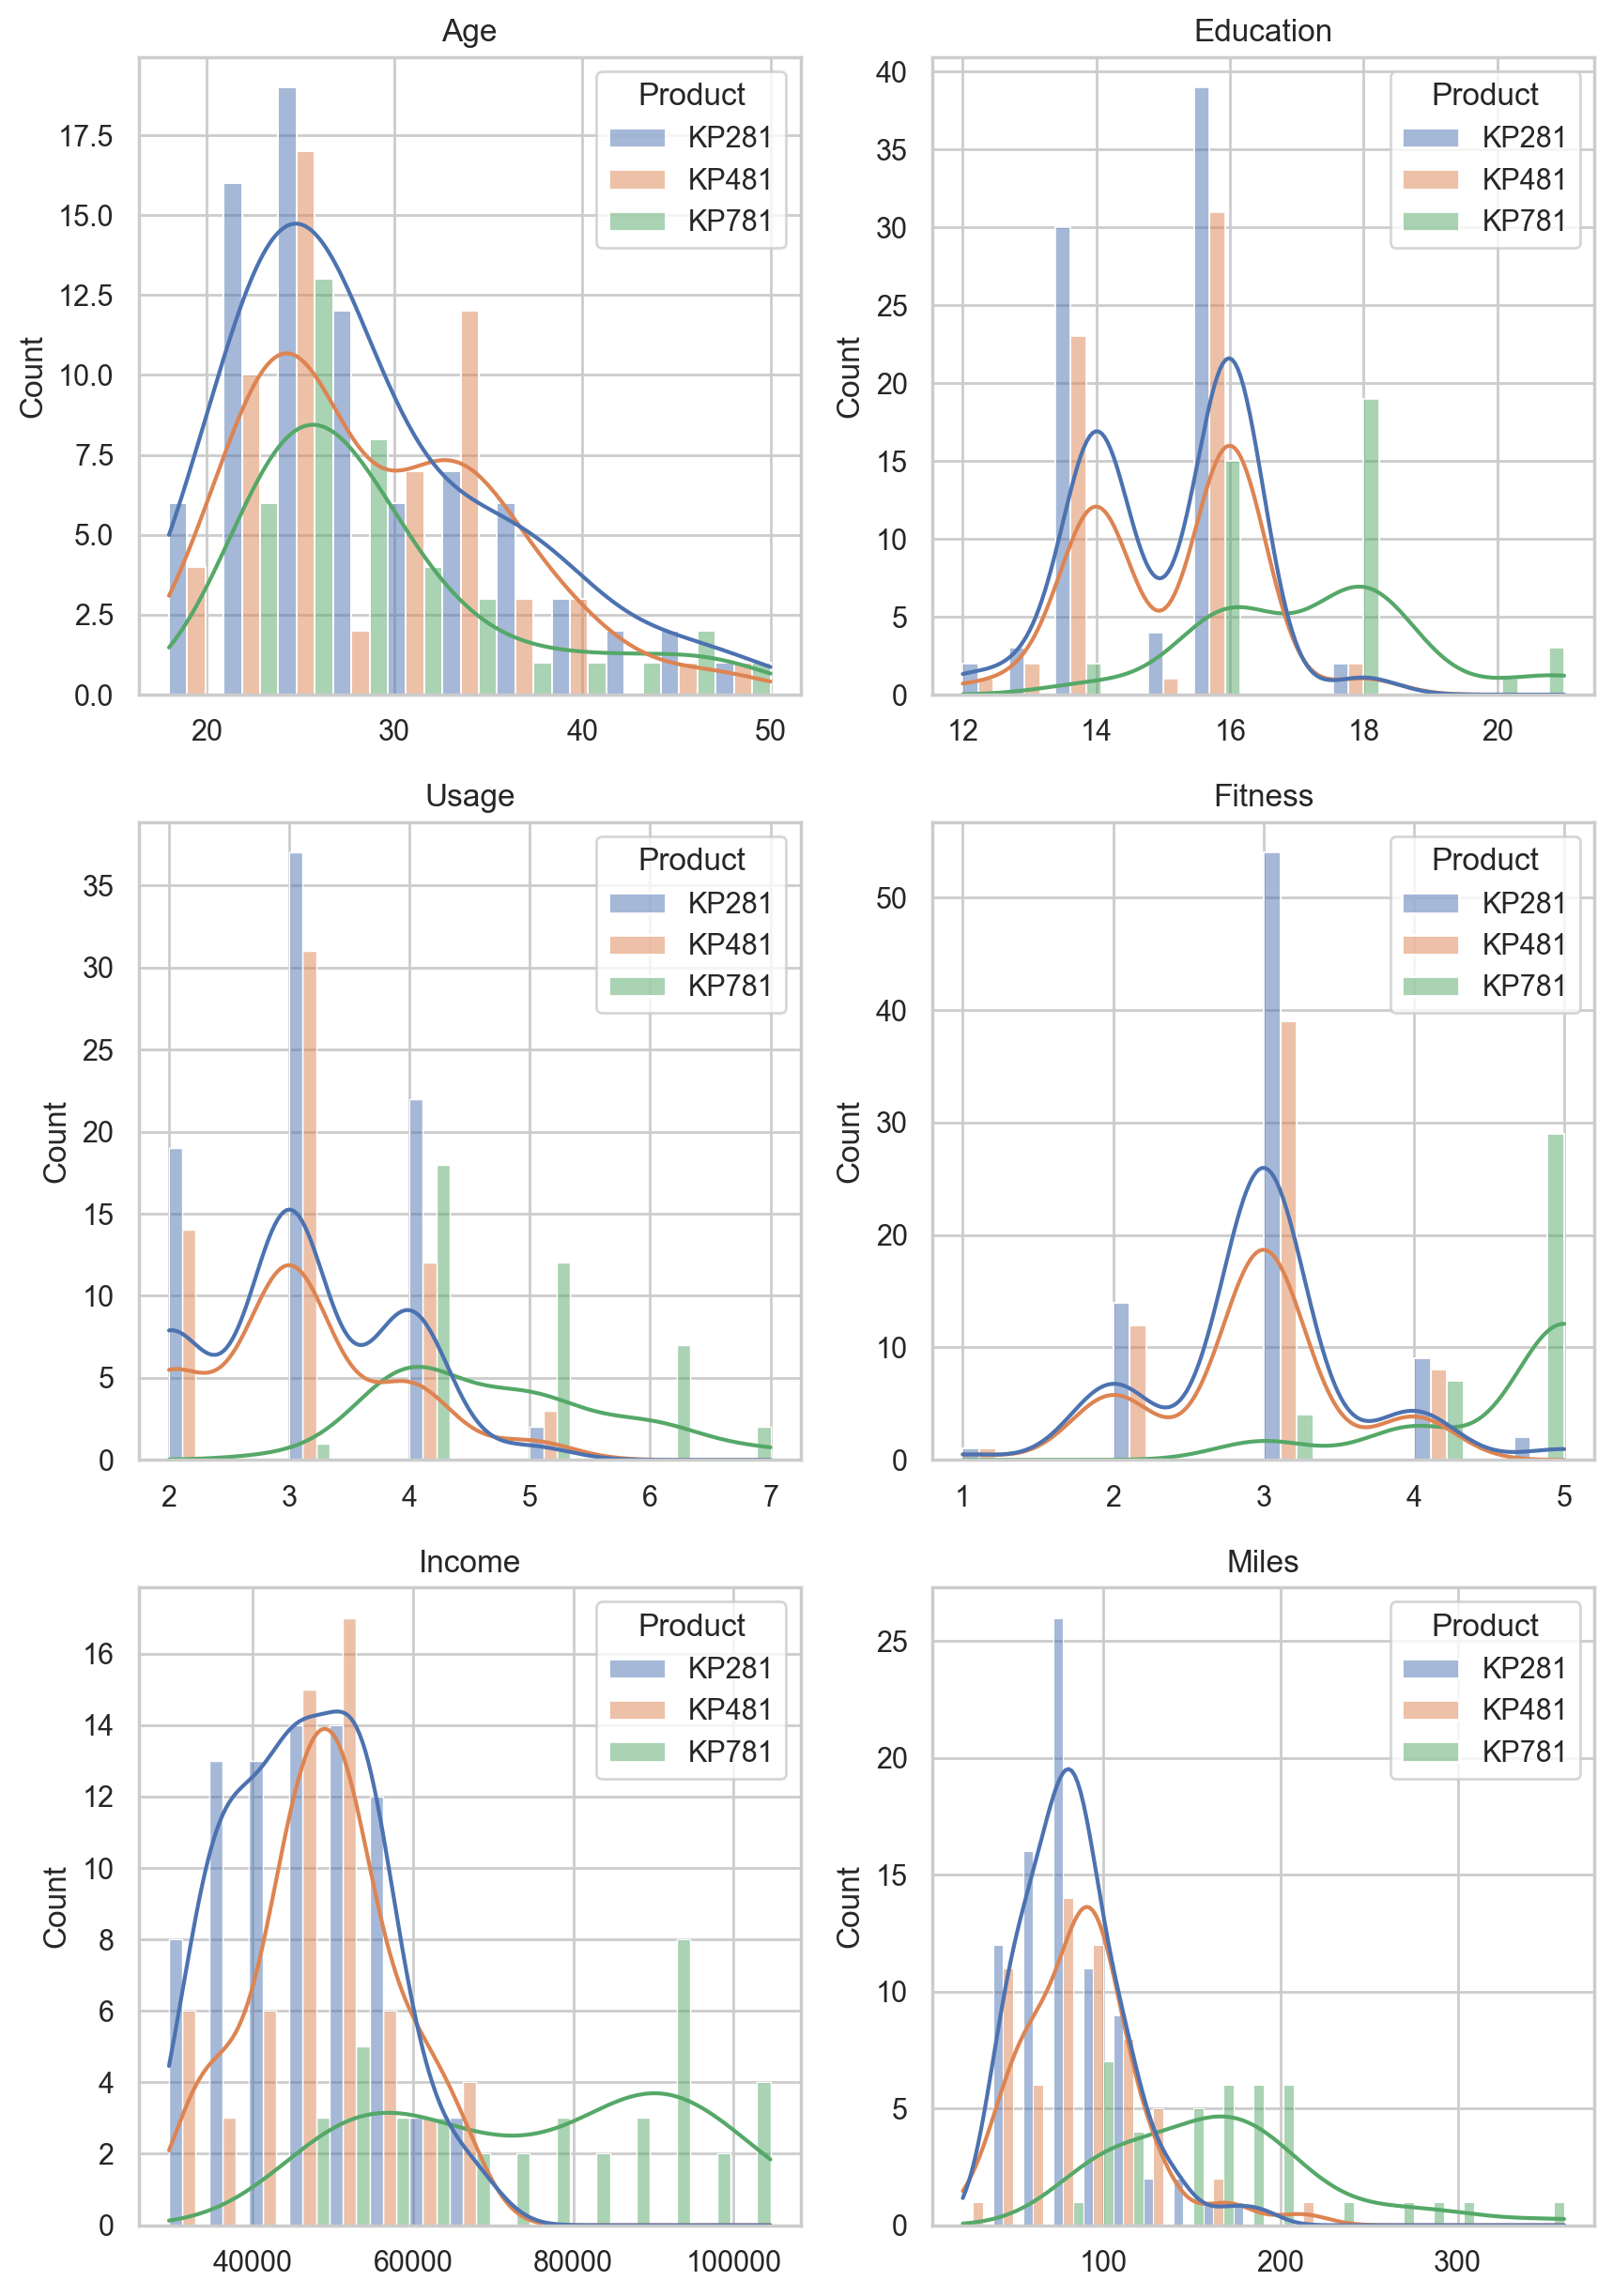

In [10]:
# Taking closer look 
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(10, 15), dpi=200)
plt.subplots_adjust(hspace=0.2)

for i, ax in zip(data.select_dtypes(exclude=['object', 'category']), axs.ravel()):
    sns.histplot(data=data, x=i, hue="Product", ax=ax, multiple='dodge', kde=True)
    ax.set_title(i)
    ax.set_xlabel('')

<AxesSubplot: >

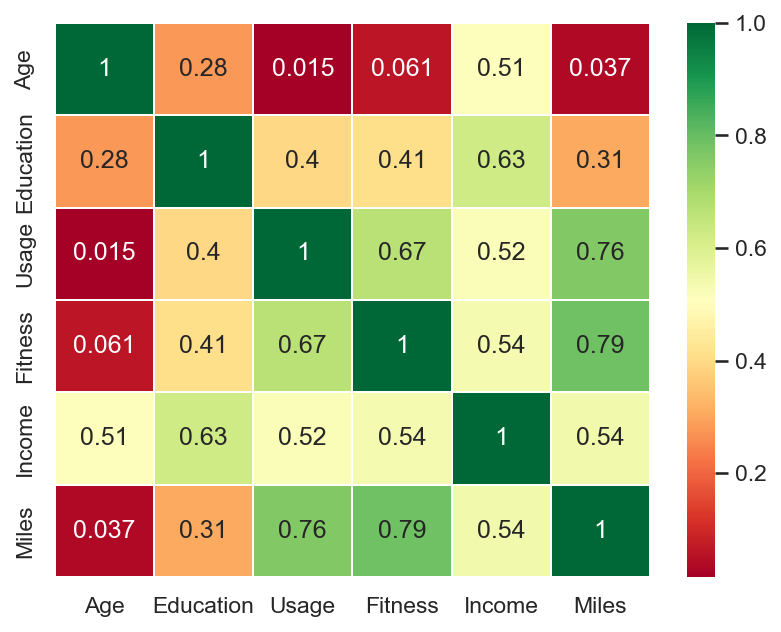

In [11]:
num_df = data.select_dtypes(exclude=['object', 'category'])
sns.heatmap(num_df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix


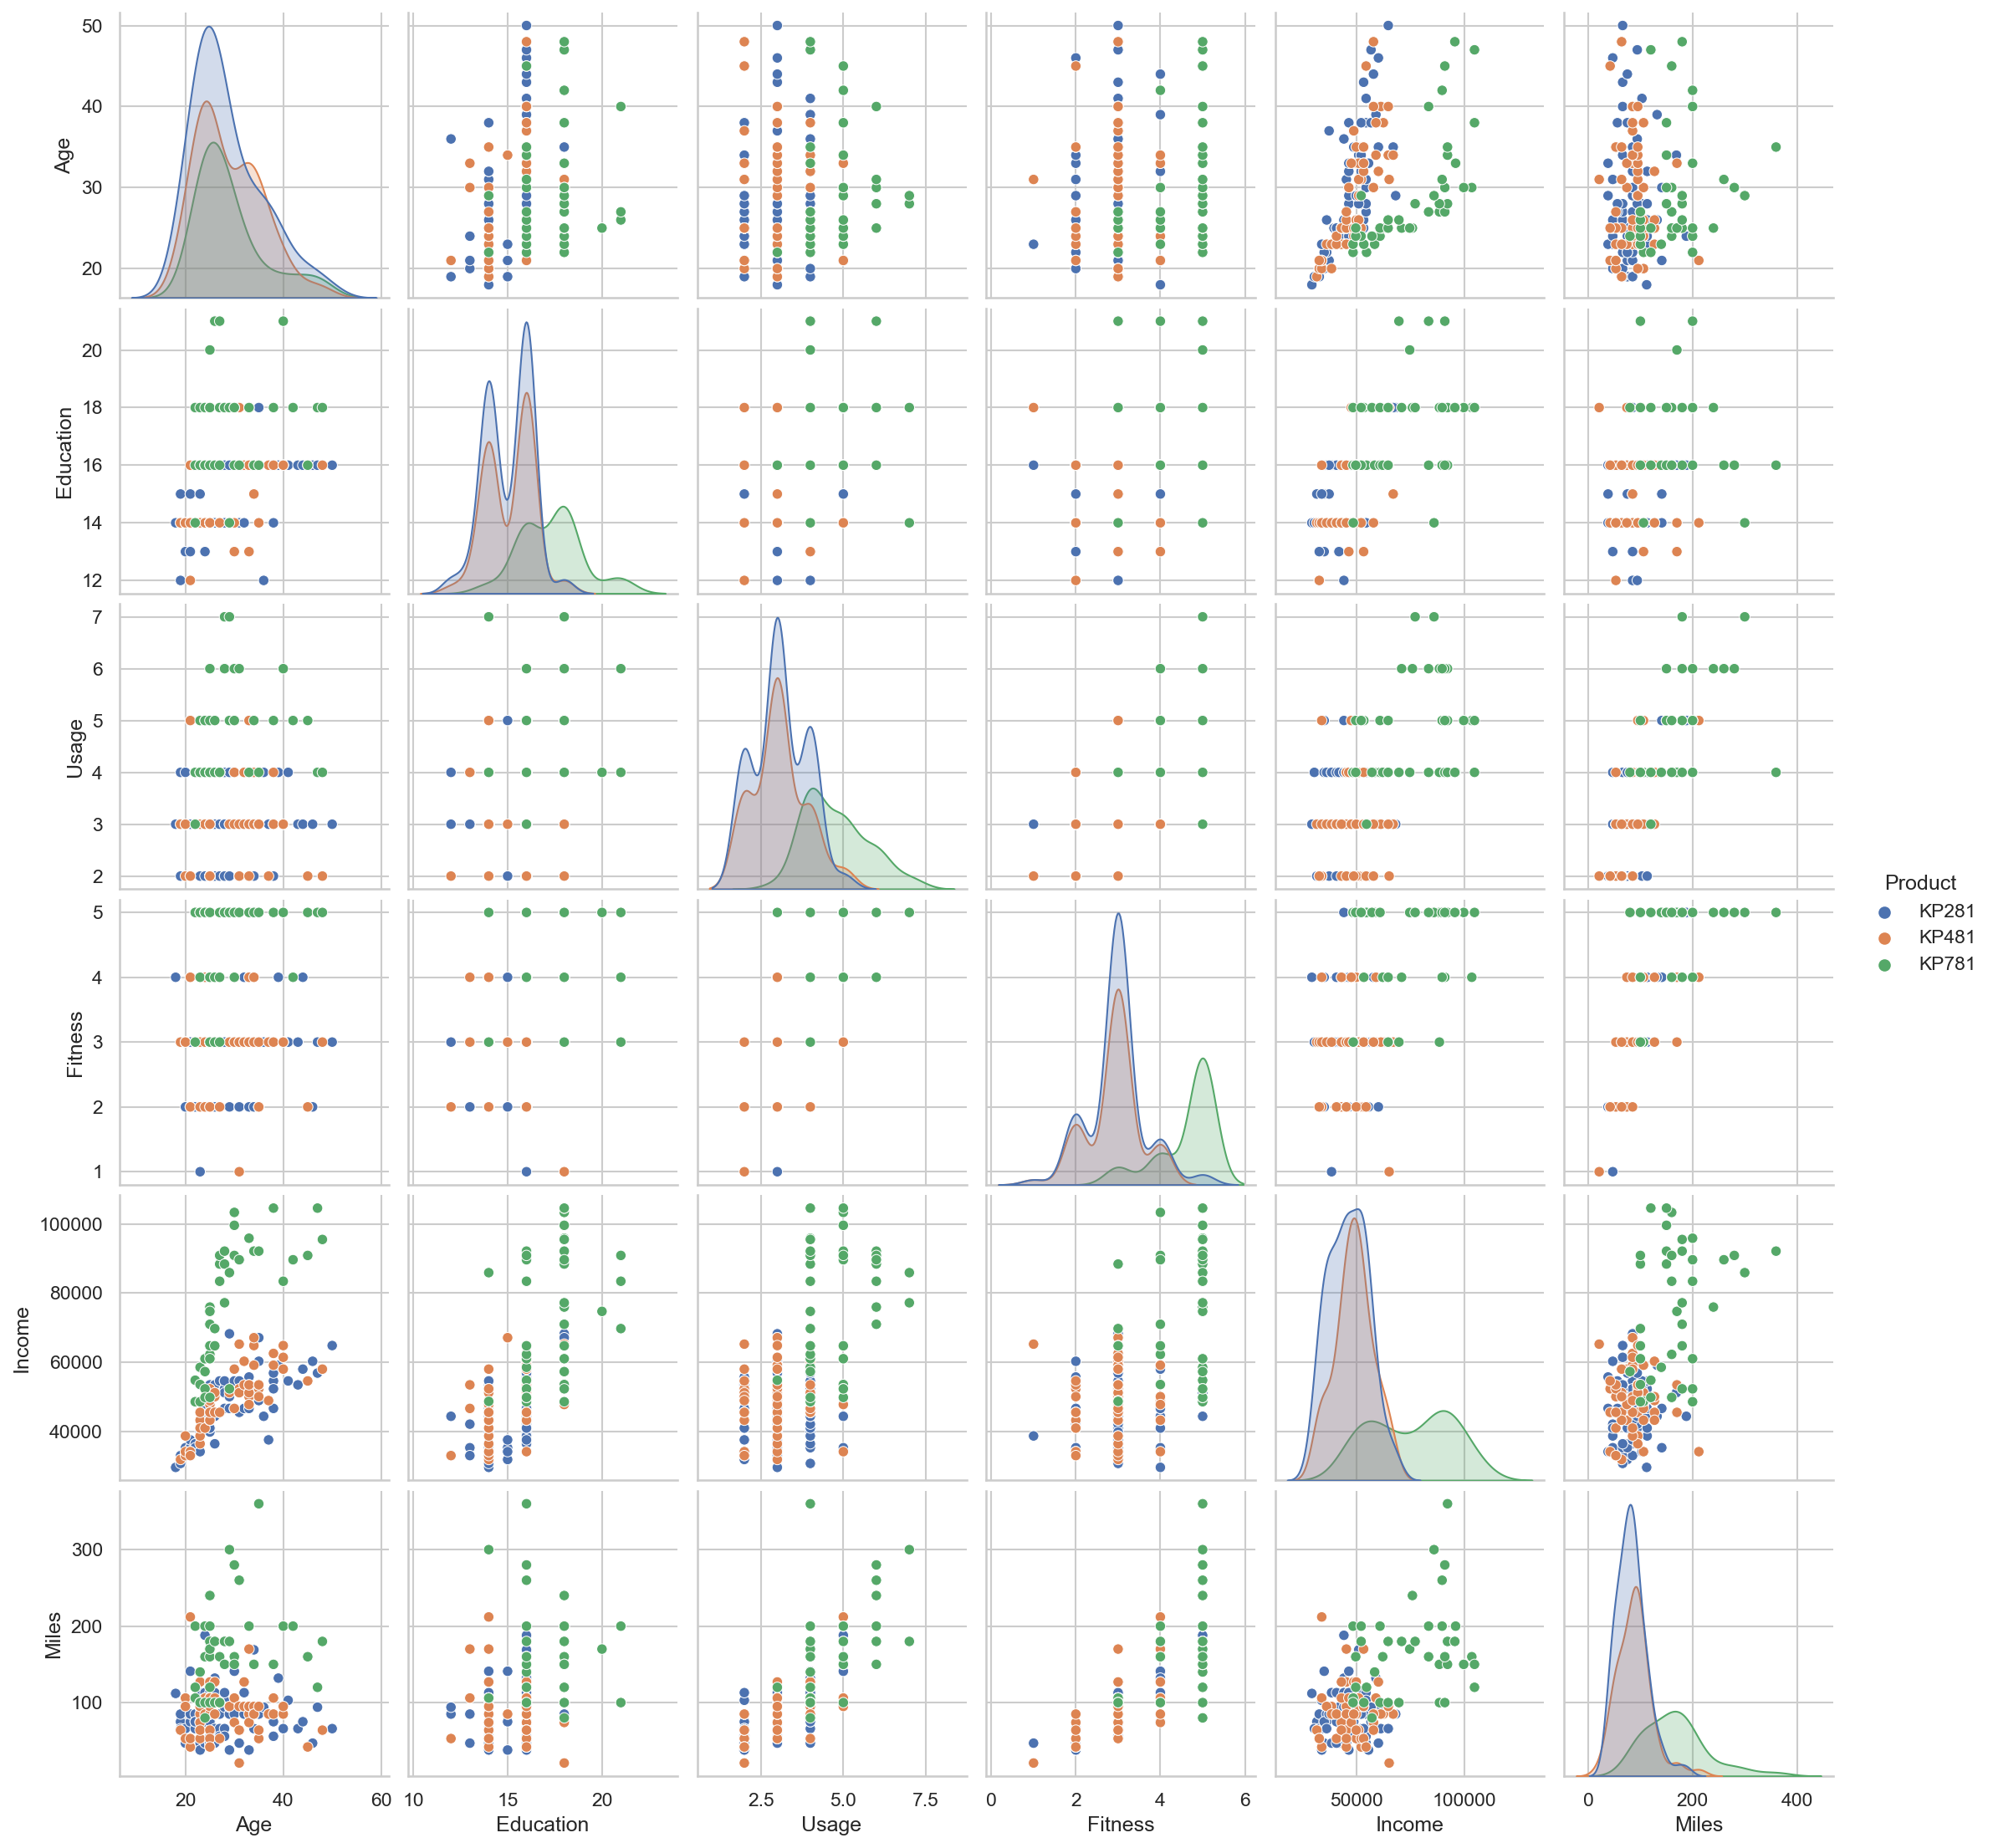

In [12]:
sns.pairplot(data, hue= 'Product')

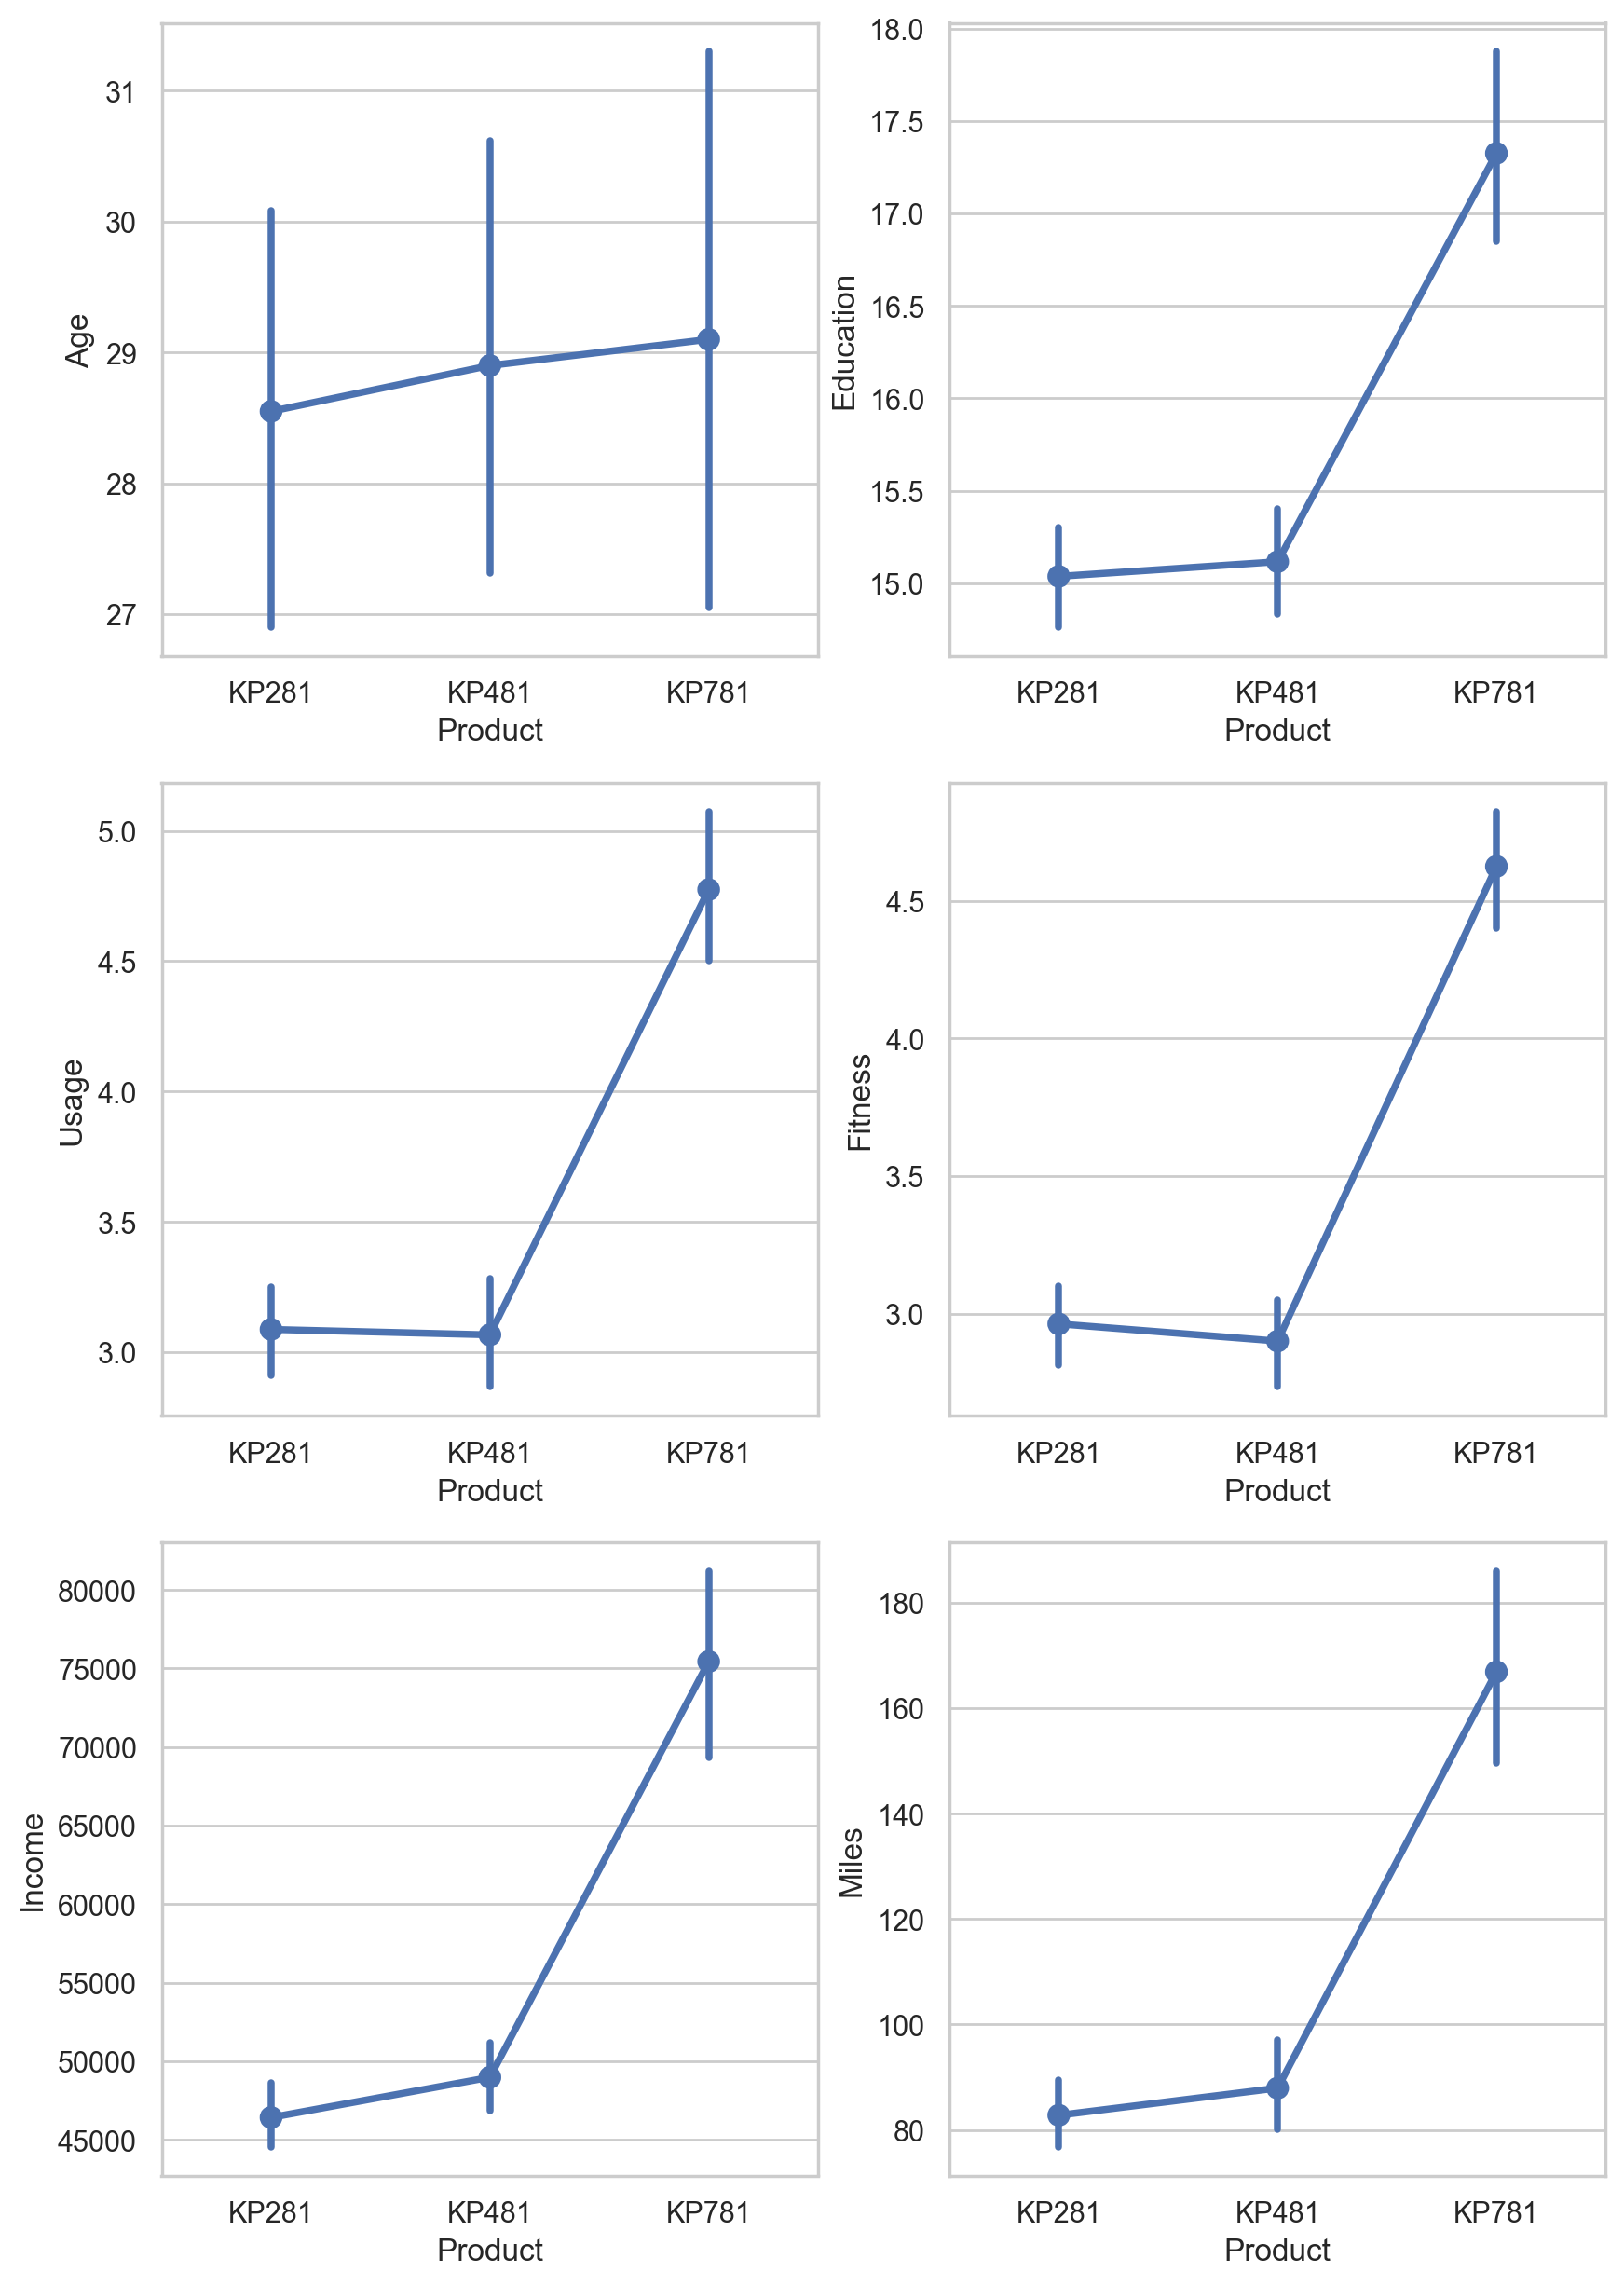

In [13]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(10, 15), dpi=200)
plt.subplots_adjust(hspace=0.2)

for i, ax in zip(data.select_dtypes(exclude=['object', 'category']), axs.ravel()):
    sns.pointplot(data=data, x='Product', y=i, ax=ax)


#### Categorical Columns vs. Product

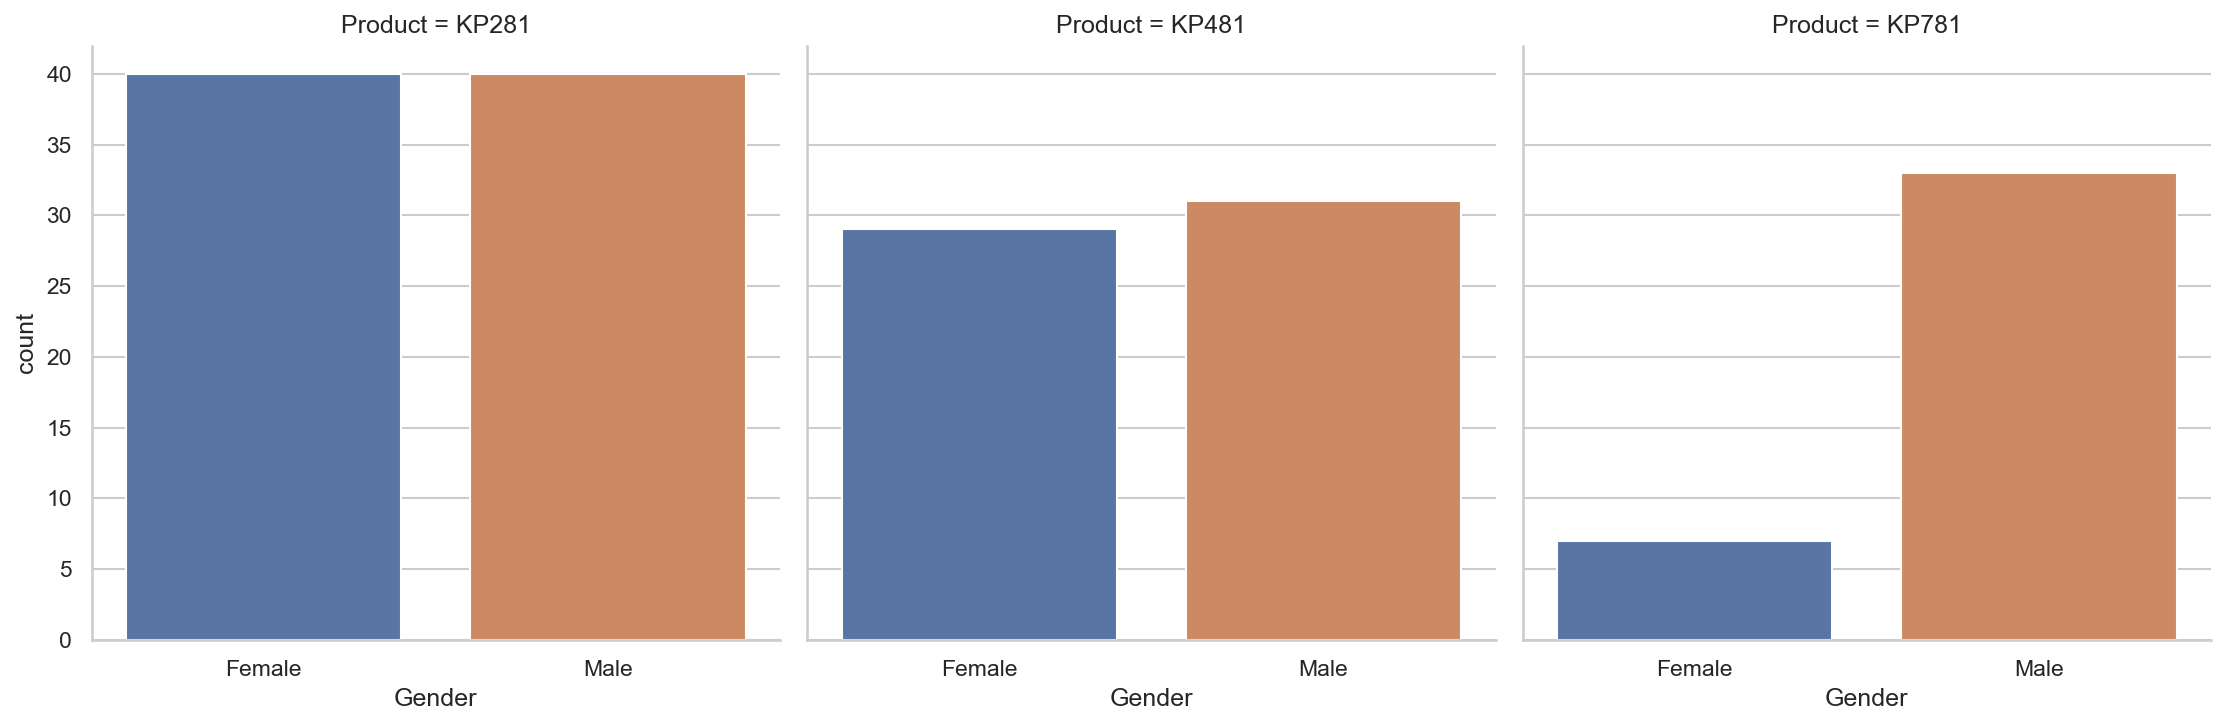

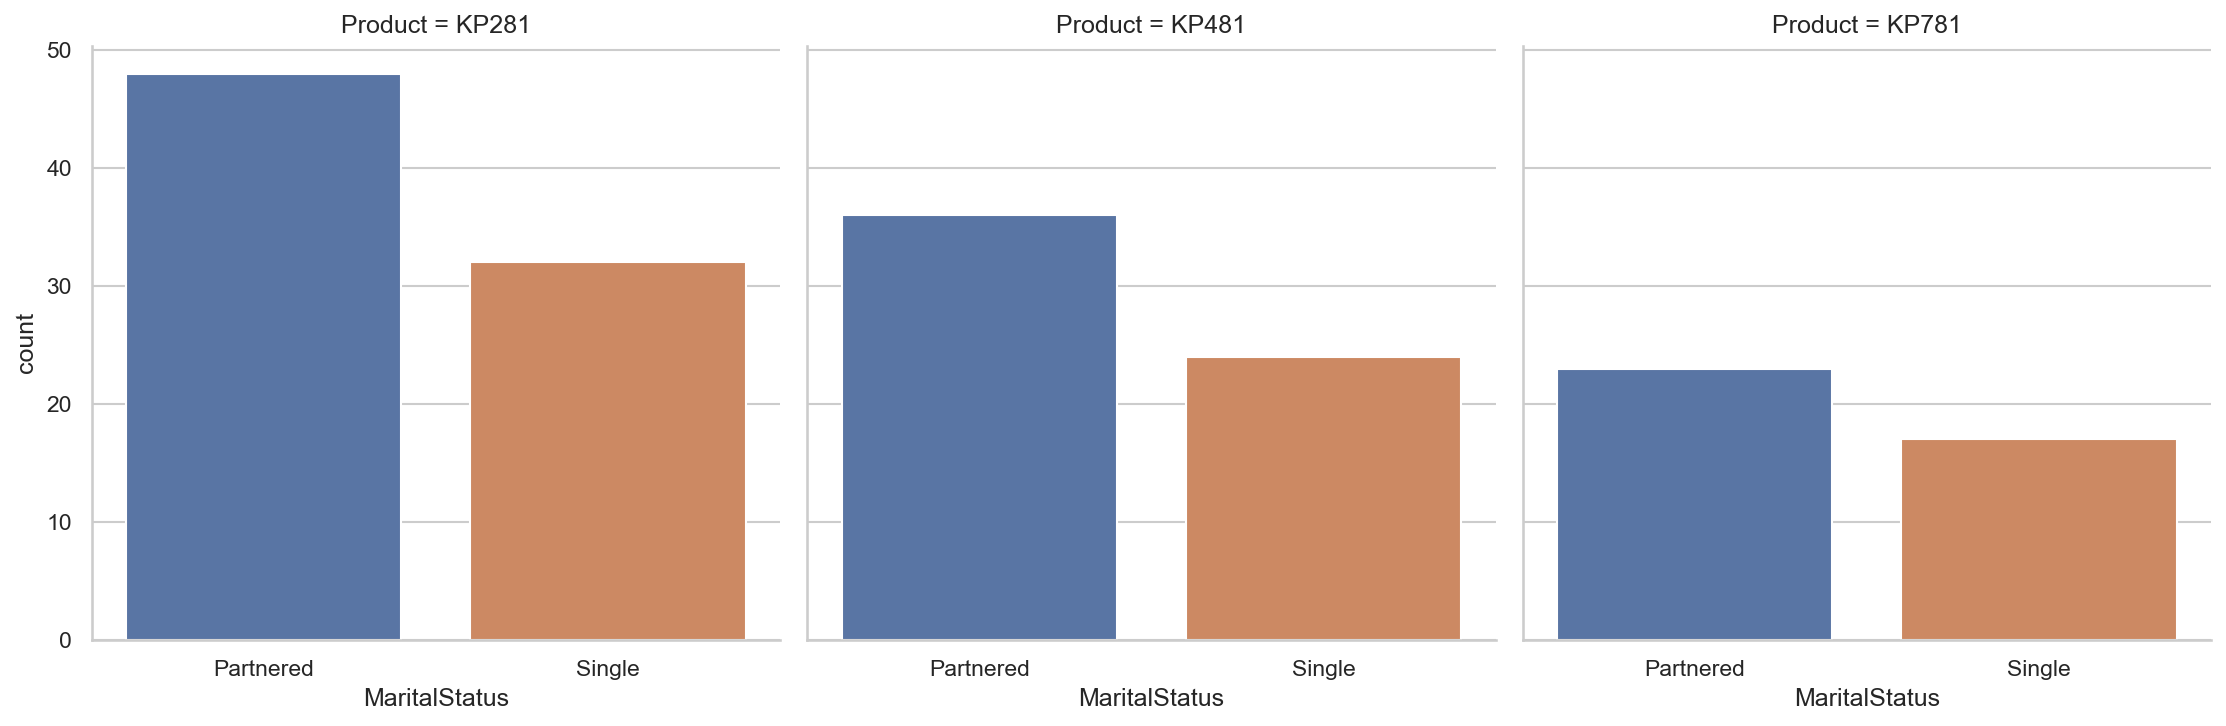

In [14]:

for i, ax in zip(['Gender', 'MaritalStatus'], axs.ravel()):
    sns.catplot(data=data, col='Product', x=i, kind='count')


### Probability Analysis

In [15]:
(
    pd.crosstab(data.Product, data.Gender, values=data.Miles, aggfunc=np.mean, margins=True)
    .style.background_gradient(cmap='summer_r')
)

Gender,Female,Male,All
Product,,,
KP281,76.200000,89.375000,82.787500
KP481,87.344828,88.483871,87.933333
KP781,180.000000,164.121212,166.900000
All,90.013158,112.826923,103.194444


In [16]:
pd.crosstab(index=data.Fitness, columns=data.Product, dropna=True).style.background_gradient(cmap='summer_r')

Product,KP281,KP481,KP781
Fitness,,,
1,1,1,0
2,14,12,0
3,54,39,4
4,9,8,7
5,2,0,29


In [17]:

for i in ['Fitness', 'Usage', 'Education']:
    display(
        (
            pd.crosstab(index=data[i], columns=data.Product, dropna=True, normalize=True, margins=True)
            .applymap(lambda x: int(round(x,2)*100))
            .style.background_gradient(cmap='summer_r')
        )
    )

Product,KP281,KP481,KP781,All
Fitness,,,,
1,1,1,0,1
2,8,7,0,14
3,30,22,2,54
4,5,4,4,13
5,1,0,16,17
All,44,33,22,100


Product,KP281,KP481,KP781,All
Usage,,,,
2,11,8,0,18
3,21,17,1,38
4,12,7,10,28
5,1,2,7,9
6,0,0,4,4
7,0,0,1,1
All,44,33,22,100


Product,KP281,KP481,KP781,All
Education,,,,
12,1,1,0,2
13,2,1,0,3
14,17,13,1,31
15,2,1,0,3
16,22,17,8,47
18,1,1,11,13
20,0,0,1,1
21,0,0,2,2
All,44,33,22,100


In [18]:
for i in ['Fitness', 'Usage', 'Education']:
    display(
        (
            pd.crosstab(index=data[i], columns=data.Product, dropna=True, normalize='index', margins=True)
            .applymap(lambda x: int(round(x,2)*100))
            .style.background_gradient(cmap='summer_r')
        )
    )

Product,KP281,KP481,KP781
Fitness,,,
1,50,50,0
2,54,46,0
3,56,40,4
4,38,33,28
5,6,0,94
All,44,33,22


Product,KP281,KP481,KP781
Usage,,,
2,57,42,0
3,54,45,1
4,42,23,35
5,12,18,71
6,0,0,100
7,0,0,100
All,44,33,22


Product,KP281,KP481,KP781
Education,,,
12,67,33,0
13,60,40,0
14,55,42,4
15,80,20,0
16,46,36,18
18,9,9,83
20,0,0,100
21,0,0,100
All,44,33,22


In [19]:
pd.cut(data.Income, bins=[25000, 45000, 65000, 85000, 105000 ]).value_counts().sort_index()

(25000, 45000]      49
(45000, 65000]     103
(65000, 85000]      11
(85000, 105000]     17
Name: Income, dtype: int64

In [20]:
(
    pd.crosstab(index=pd.cut(data.Income, bins=[25000, 45000, 65000, 85000, 105000 ]), 
                columns=data.Product, dropna=True, normalize='index', margins=True)
    .style.background_gradient(cmap='RdYlGn')
)

Product,KP281,KP481,KP781
Income,,,
"(25000, 45000]",0.693878,0.306122,0.000000
"(45000, 65000]",0.427184,0.417476,0.155340
"(65000, 85000]",0.181818,0.181818,0.636364
"(85000, 105000]",0.000000,0.000000,1.000000
All,0.444444,0.333333,0.222222


In [21]:
(
    pd.crosstab(index=pd.cut(data.Miles, bins=[0,50,100,150,200,250,300,350,400]), columns=data.Product, normalize='index', margins=True)
    .style.background_gradient(cmap='RdYlGn')
)

Product,KP281,KP481,KP781
Miles,,,
"(0, 50]",0.705882,0.294118,0.000000
"(50, 100]",0.515464,0.402062,0.082474
"(100, 150]",0.421053,0.342105,0.236842
"(150, 200]",0.090909,0.090909,0.818182
"(200, 250]",0.000000,0.500000,0.500000
"(250, 300]",0.000000,0.000000,1.000000
"(350, 400]",0.000000,0.000000,1.000000
All,0.444444,0.333333,0.222222


In [22]:
!python --version

Python 3.10.7
